# Deep Learning Project - Traffic Signs Image Classification

In [1]:
import os, shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def save_hist_to_excel(filename):
    df = pd.DataFrame(history.history)
    df.to_excel(filename + '.xlsx')

## Overview of the training data

In [3]:
#setting the training directory (the training images can be found there, already sorted by class into folders)
#base_training_dir = "/Users/henriquevaz/NOVA IMS/YEAR 1/SPRING SEMESTER/DL/Project/my_notebooks/Data/Training/Final_Training/Images/"
base_training_dir = "/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/"
#base_training_dir = "/Users/franz/Desktop/DL Project/Train/Final_Training/Images"

#setting the directory where the selected training and validation images will be stored in
#created_dir = "/Users/henriquevaz/NOVA IMS/YEAR 1/SPRING SEMESTER/DL/Project/my_notebooks/Data/Selected"
created_dir = "/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Selected"
#created_dir = "/Users/franz/Desktop/DL Project/Selected"

#storing all the folder names that belong to the respective classes
all_classes = sorted(i for i in os.listdir(base_training_dir) if i.startswith("0"))

print("There are", len(all_classes), "different classes within the training data!")

There are 43 different classes within the training data!


In [4]:
#getting the number of images within each class of the training data
amount_per_class = {}

for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    amount_per_class[i] = len(sorted(i for i in os.listdir(directory) if i.startswith("0")))

amount_per_class_df = pd.DataFrame.from_dict(amount_per_class, orient='index').rename(columns={0:"amount"})
amount_per_class_df.index.name = 'class'

#remove the "#" of the following line to display the number of images within each class
#amount_per_class_df

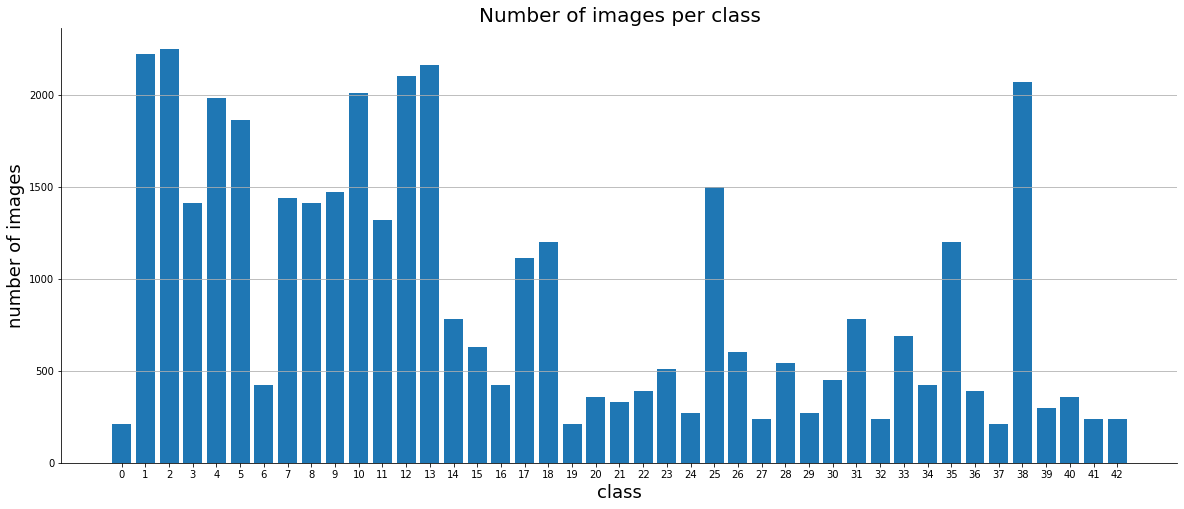

In [5]:
#displaying the number of images per class visually

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
plt.bar(amount_per_class_df.index, amount_per_class_df.amount)
plt.title("Number of images per class", fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('number of images', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(amount_per_class_df.index)
plt.grid(axis="y")
plt.show()

As it can be seen in the bar chart, the dataset is highly unbalanced. Some classes have over 2000 instances, while others only have 210.

In [6]:
#displaying the 20 classes with the fewest images
amount_per_class_df.sort_values("amount").head(20).T

class,0,37,19,32,27,41,42,24,29,39,21,40,20,36,22,6,16,34,30,23
amount,210,210,210,240,240,240,240,270,270,300,330,360,360,390,390,420,420,420,450,510


Within each class, there are several groups of images, that belong together (these are basically all images of the very same traffic sign, that just differ in that they were made as a series while approaching the actual sign). These series of images shouldn't be splitted later when the data is split into training and validation sets, so some precautions might be useful:

In [7]:
#checking the size(=amount of images) of these series and whether they are all having the same size

#running a for loop over all classes
for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    
    #get the names of all images within a class
    list_of_images = sorted(i for i in os.listdir(directory) if i.startswith("0"))

    image_series = []
    
    #store all the prefixes of the images (which correspond to the series they belong to)
    for element in list_of_images:
        image_series.append(element.split("_")[0])
    
    #count the frequency of each prefix, which equals the size of each respective series
    image_counts = pd.Series(image_series).value_counts().sort_index()

    for element in image_counts.values.tolist():
        if element != image_counts.values.tolist()[0]:
            #this line will show if there is a series that contains not the same number of images than the others
            print("There is a series whose number doesn't match the others in class", all_classes[i], ", with the prefix", image_counts.sort_values().index[0], "!\nIt only contains", element, "images.")
            

#apart from only one series, all others consist of exactly 30 images
print("All the other series of images contain exactly", image_counts.values.tolist()[0], "images!")

There is a series whose number doesn't match the others in class 00033 , with the prefix 00019 !
It only contains 29 images.
All the other series of images contain exactly 30 images!


## Data Preprocessing

After running the upper part once, the notebook can be started from here from now on:

In [8]:
#this cell is optional and the notebook should be runned from here once the upper part has been executed once

import os, shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
from PIL import Image
import numpy as np

In [9]:
#train_dir = new_train_dir
#validation_dir = new_val_dir

train_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'

##### Normalization

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size=20,
    class_mode="categorical",
    color_mode="grayscale"
    )


#validation_generator = test_datagen.flow_from_directory(
#    validation_dir,
#    target_size=(100,100),
#    batch_size=20,
#    class_mode="categorical",
#    color_mode="grayscale"
#    )

Found 39209 images belonging to 43 classes.


In [11]:
x_train=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
#x_val=np.concatenate([validation_generator.next()[0] for i in range(validation_generator.__len__())])

In [12]:
train_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
#test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

train_datagen.fit(x_train)
#test_datagen.fit(x_val)

##### Re-Creating the generators with the normalized image data

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size=20,
    class_mode="categorical",
    color_mode="grayscale"
    )



#validation_generator = test_datagen.flow_from_directory(
#    validation_dir,
#    target_size=(100,100),
#    batch_size=20,
#    class_mode="categorical",
#    color_mode="grayscale"
#    )

Found 39209 images belonging to 43 classes.


In [14]:
sys.modules['Image'] = Image

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 100, 100, 1)
labels batch shape: (20, 43)


## Define the final model without weights

Note that in this one the filter size is changed

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(128, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2 ))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense (43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       4

In [16]:
from tensorflow.keras import optimizers

#compilation
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

## Train the final model without weights

In [17]:
items = ['loss', 'acc']
history_all = {}
for item in items:
    history_all[item] = []
history_all

{'loss': [], 'acc': []}

In [18]:
for i in range(30):
    
    history = model.fit(
        train_generator,
        epochs=1,
        #validation_data=validation_generator,
    )
    
    for item in items:
        history_all[item].append(history.history[item][0])
    
    filename_model = 'model_final_without_weights_after_epoch_' + str(i+1)
    model.save(filename_model)

1961/1961 [==============================] - 486s 248ms/step - loss: 6.6950 - acc: 0.1224
INFO:tensorflow:Assets written to: model_final_without_weights_after_epoch_1/assets
1961/1961 [==============================] - 483s 246ms/step - loss: 0.8926 - acc: 0.7753
INFO:tensorflow:Assets written to: model_final_without_weights_after_epoch_2/assets
1961/1961 [==============================] - 469s 239ms/step - loss: 0.3015 - acc: 0.9290
INFO:tensorflow:Assets written to: model_final_without_weights_after_epoch_3/assets
1961/1961 [==============================] - 471s 240ms/step - loss: 0.1685 - acc: 0.9620
INFO:tensorflow:Assets written to: model_final_without_weights_after_epoch_4/assets
1961/1961 [==============================] - 479s 244ms/step - loss: 0.1319 - acc: 0.9727
INFO:tensorflow:Assets written to: model_final_without_weights_after_epoch_5/assets
1961/1961 [==============================] - 475s 242ms/step - loss: 0.1147 - acc: 0.9756
INFO:tensorflow:Assets written to: model

In [19]:
history_all

{'loss': [3.4027109146118164,
  0.892641544342041,
  0.3014829456806183,
  0.16853052377700806,
  0.13191065192222595,
  0.11468961834907532,
  0.10032199323177338,
  0.0900762751698494,
  0.10165528953075409,
  0.09890156239271164,
  0.09989015012979507,
  0.09875241667032242,
  0.10663498938083649,
  0.10022079944610596,
  0.11589805036783218,
  0.1107989251613617,
  0.11062225699424744,
  0.13650578260421753,
  0.13805444538593292,
  0.13413140177726746,
  0.13459424674510956,
  0.12857301533222198,
  0.14463230967521667,
  0.1517903208732605,
  0.14522968232631683,
  0.15858441591262817,
  0.1410127580165863,
  0.13110904395580292,
  0.14842389523983002,
  0.15623420476913452],
 'acc': [0.27264147996902466,
  0.7752811908721924,
  0.9290469288825989,
  0.9619730114936829,
  0.972710371017456,
  0.9756433367729187,
  0.9787548780441284,
  0.9814838171005249,
  0.9814838171005249,
  0.9822489619255066,
  0.9827335476875305,
  0.9820449352264404,
  0.9816879034042358,
  0.983422160148

In [20]:
df = pd.DataFrame(history_all)
df.to_excel('history_final_without_weights.xlsx')

## Define the final model with weights

In [22]:
size_per_class_list = []

for i in range(len(all_classes)):
    size_per_class_list.append([len(os.listdir(train_dir + "/" + all_classes[i]))])
    print("Class", i, ": training set size =", len(os.listdir(train_dir + "/" + all_classes[i])))

Class 0 : training set size = 211
Class 1 : training set size = 2221
Class 2 : training set size = 2251
Class 3 : training set size = 1411
Class 4 : training set size = 1981
Class 5 : training set size = 1861
Class 6 : training set size = 421
Class 7 : training set size = 1441
Class 8 : training set size = 1411
Class 9 : training set size = 1471
Class 10 : training set size = 2011
Class 11 : training set size = 1321
Class 12 : training set size = 2101
Class 13 : training set size = 2161
Class 14 : training set size = 781
Class 15 : training set size = 631
Class 16 : training set size = 421
Class 17 : training set size = 1111
Class 18 : training set size = 1201
Class 19 : training set size = 211
Class 20 : training set size = 361
Class 21 : training set size = 331
Class 22 : training set size = 391
Class 23 : training set size = 511
Class 24 : training set size = 271
Class 25 : training set size = 1501
Class 26 : training set size = 601
Class 27 : training set size = 241
Class 28 : trai

In [23]:
train_size_per_class = []

for element in size_per_class_list:
    train_size_per_class.append(element[0])
    
class_weights = {}

i = 0
for element in train_size_per_class:
    class_weights[i] = max(train_size_per_class) / element
    i += 1

In [ ]:
class_weights

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(128, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2 ))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense (43, activation='softmax'))

model.summary()

In [ ]:
from tensorflow.keras import optimizers

#compilation
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

## Train the final model with weights

In [ ]:
items = ['loss', 'acc']
history_all = {}
for item in items:
    history_all[item] = []
history_all

In [ ]:
for i in range(30):
    
    history = model.fit(
        train_generator,
        epochs=1,
        #validation_data=validation_generator,
        class_weight=class_weights
    )
    
    for item in items:
        history_all[item].append(history.history[item][0])
    
    filename_model = 'model_final_with_weights_after_epoch_' + str(i+1)
    model.save(filename_model)

In [ ]:
history_all

In [ ]:
df = pd.DataFrame(history_all)
df.to_excel('history_final_with_weights.xlsx')

In [ ]:
#Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()